In [252]:
# ASSIGNMENT 1
# Name: Aditi M. Chavan
# Panel 2
# PB 54
# Topic: Pre-processing
# 1. Handling missing value
# 2. Imputer class (mean mode)
# 3. Normalization - l1, l2 normalization
# 4. variance threshold
# 5. Encoders: Label, one-hot encoder 
# 6. Vectorizer - dict, vect, 
# 7. polynomial feature - checking linear regression
# 8. pipeline
# 9. pca

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [254]:
df=pd.read_csv("C:\\Users\\Aditi\\Desktop\\ML\\Employee\\Emp.csv")

In [255]:
df.head()

,empno,ename,job,DOJ,DOB,deptid,salary
0,1,Anil,Clerk,NaN,NaN,NaN,NaN
1,2,Balkrushna,NaN,15-Jul-17,16-Mar-12,10.0,10000.0
2,3,Mathew,Manager,16-Mar-12,16-Mar-92,20.0,50000.0
3,4,Suhas,Manager,16-Mar-12,17-Mar-91,20.0,NaN
4,5,Vimal,Accountant,18-Mar-17,18-Mar-91,20.0,45000.0


In [256]:
df.isna() #boolean O/P depending if the value is nan or not

,empno,ename,job,DOJ,DOB,deptid,salary
0,False,False,False,True,True,True,True
1,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False


In [257]:
df.dropna(thresh=6) #drops records which don't have atleast 'thresh' no. of non-Nan values

,empno,ename,job,DOJ,DOB,deptid,salary
1,2,Balkrushna,NaN,15-Jul-17,16-Mar-12,10.0,10000.0
2,3,Mathew,Manager,16-Mar-12,16-Mar-92,20.0,50000.0
3,4,Suhas,Manager,16-Mar-12,17-Mar-91,20.0,NaN
4,5,Vimal,Accountant,18-Mar-17,18-Mar-91,20.0,45000.0
5,6,Kamal,Accountant,19-Nov-13,18-Mar-91,20.0,45000.0
6,7,Nanda,Manager,20-Mar-12,20-Jan-97,20.0,52000.0
7,8,Khushi,Manager,21-Mar-12,21-Jun-94,20.0,56000.0
8,9,Sayee,Cleark,16-Mar-12,22-Aug-98,NaN,21000.0
9,10,Sakhi,Accountant,23-Mar-12,14-Mar-91,30.0,46000.0
10,11,Soniya,Accountant,24-Mar-14,24-Mar-91,30.0,47000.0


In [258]:
df.fillna(0) # replace 0 inplace of NaN

,empno,ename,job,DOJ,DOB,deptid,salary
0,1,Anil,Clerk,0,0,0.0,0.0
1,2,Balkrushna,0,15-Jul-17,16-Mar-12,10.0,10000.0
2,3,Mathew,Manager,16-Mar-12,16-Mar-92,20.0,50000.0
3,4,Suhas,Manager,16-Mar-12,17-Mar-91,20.0,0.0
4,5,Vimal,Accountant,18-Mar-17,18-Mar-91,20.0,45000.0
5,6,Kamal,Accountant,19-Nov-13,18-Mar-91,20.0,45000.0
6,7,Nanda,Manager,20-Mar-12,20-Jan-97,20.0,52000.0
7,8,Khushi,Manager,21-Mar-12,21-Jun-94,20.0,56000.0
8,9,Sayee,Cleark,16-Mar-12,22-Aug-98,0.0,21000.0
9,10,Sakhi,Accountant,23-Mar-12,14-Mar-91,30.0,46000.0


In [259]:
df['deptid'].fillna(0) # replace 0 inplace of NaN for specified column

0      0.0
1     10.0
2     20.0
3     20.0
4     20.0
5     20.0
6     20.0
7     20.0
8      0.0
9     30.0
10    30.0
Name: deptid, dtype: float64

In [260]:
df['salary'].ffill() #propagates last valid observation forward (if(salary[i]) == NaN then set deptid[i]= previous non-NaN salary)

0         NaN
1     10000.0
2     50000.0
3     50000.0
4     45000.0
5     45000.0
6     52000.0
7     56000.0
8     21000.0
9     46000.0
10    47000.0
Name: salary, dtype: float64

In [261]:
df['deptid'].bfill() ##propagates next valid observation backward (if(deptid[i]) == NaN then set deptid[i]= next non-NaN deptid)

0     10.0
1     10.0
2     20.0
3     20.0
4     20.0
5     20.0
6     20.0
7     20.0
8     30.0
9     30.0
10    30.0
Name: deptid, dtype: float64

In [262]:
df.drop_duplicates() #removes records with same data

,empno,ename,job,DOJ,DOB,deptid,salary
0,1,Anil,Clerk,NaN,NaN,NaN,NaN
1,2,Balkrushna,NaN,15-Jul-17,16-Mar-12,10.0,10000.0
2,3,Mathew,Manager,16-Mar-12,16-Mar-92,20.0,50000.0
3,4,Suhas,Manager,16-Mar-12,17-Mar-91,20.0,NaN
4,5,Vimal,Accountant,18-Mar-17,18-Mar-91,20.0,45000.0
5,6,Kamal,Accountant,19-Nov-13,18-Mar-91,20.0,45000.0
6,7,Nanda,Manager,20-Mar-12,20-Jan-97,20.0,52000.0
7,8,Khushi,Manager,21-Mar-12,21-Jun-94,20.0,56000.0
8,9,Sayee,Cleark,16-Mar-12,22-Aug-98,NaN,21000.0
9,10,Sakhi,Accountant,23-Mar-12,14-Mar-91,30.0,46000.0


In [263]:
#28/07/20

In [264]:
from sklearn.impute import SimpleImputer #import 

#imputer obj using 'mean' strategy & missing value type for imputation
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data =[[12,np.nan,34], [10,32,np.nan], [np.nan,11,20]]
print("Original Data : ", data)
imputer = imputer.fit(data) #fitting data to imputer obj
data = imputer.transform(data) #inputing data
print("Inputed Data : ", data)

Original Data :  [[12, nan, 34], [10, 32, nan], [nan, 11, 20]]
Inputed Data :  [[12.  21.5 34. ]
 [10.  32.  27. ]
 [11.  11.  20. ]]


In [265]:
dataset = pd.read_csv("C:\\Users\\Aditi\\Desktop\\ML\\pima-indians-diabetes.csv", header=None)
print(dataset.head(20)) #display first 20 rows

     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1


In [266]:
num_missing = (dataset[[1,2,3,4,5]] == 0).sum()
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [267]:
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0,np.nan) #replace Nan with 0
print(dataset.isnull().sum()) # NaN occurances in each column

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [268]:
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0,np.nan)
print(dataset.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

In [269]:
print(dataset.shape)
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)
dataset.dropna(inplace=True)
print(dataset.shape) # summarize df shape after removing NaN

(768, 9)
(392, 9)


In [270]:
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)
dataset.fillna(dataset.mean(),inplace=True)  #replace Nan with mean 
print(dataset.isnull().sum()) # NaN occurances in each column

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


In [271]:
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)
values = dataset.values
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
transformed_values = imputer.fit_transform(values)
transformed_values # NaN occurances in each column

array([[  1.   ,  89.   ,  66.   , ...,   0.167,  21.   ,   0.   ],
       [  0.   , 137.   ,  40.   , ...,   2.288,  33.   ,   1.   ],
       [  3.   ,  78.   ,  50.   , ...,   0.248,  26.   ,   1.   ],
       ...,
       [  2.   ,  88.   ,  58.   , ...,   0.766,  22.   ,   0.   ],
       [ 10.   , 101.   ,  76.   , ...,   0.171,  63.   ,   0.   ],
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ]])

In [272]:
from sklearn.preprocessing import Normalizer
data = np.array([[4.0,8.0],[6.0,5.0]])
n_max=Normalizer(norm='l2')
d1=n_max.fit_transform(data)
data
d1

array([[0.4472136 , 0.89442719],
       [0.76822128, 0.6401844 ]])

In [273]:
n_l2 = Normalizer(norm = 'max')       
n_l2.fit_transform(data)

array([[0.5       , 1.        ],
       [1.        , 0.83333333]])

In [274]:
from sklearn.feature_selection import VarianceThreshold
X = np.array([
    [-3.5077778, -3.4567063, 0.9681903],
    [-3.82581314, 5.77984656, 1.78926338],
    [-2.62090281, -4.90597966, 0.27943565]
])
vt = VarianceThreshold(threshold = 1.5)
x_t = vt.fit_transform(X)
x_t

array([[-3.4567063 ],
       [ 5.77984656],
       [-4.90597966]])

In [275]:
#29/07/20

In [276]:
from sklearn.datasets import load_boston

In [277]:
boston = load_boston()
X = boston.data
Y = boston.target

In [278]:
X.shape

(506, 13)

In [279]:
Y.shape

(506,)

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [281]:
y=np.random.choice(('Male','Female'), size=(10))
y

array(['Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male'], dtype='<U6')

In [287]:
# Label Encoder - encodes target with values b/w 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
vt = le.fit_transform(y)
print(y)
print(vt)

['Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male']
[1 1 1 0 1 0 1 1 1 1]


In [288]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [289]:
le.transform(["tokyo","tokyo","paris"])

array([2, 2, 1], dtype=int64)

In [290]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

In [335]:
df=pd.read_csv('C:\\Users\\Aditi\\Downloads\\iris.csv')

In [336]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [337]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
le=label_encoder.fit_transform(df['Species'])
print(df['Species'].unique())
#le=le.reshape(-1,-1)
print(le)


[0 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [338]:
#integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded.reshape(-1,1))

[[1]
 [0]]


In [339]:
#binary encode

onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(integer_encoded.reshape(-1,1))
print(onehot_encoded)

  (0, 1)	1.0
  (1, 0)	1.0


C:\Users\Aditi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [299]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(le.reshape(-1,1))
onehot_encoded

C:\Users\Aditi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [300]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import OneHotEncoder

data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot',]
values = array(data)
print(values)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']


In [301]:
sample = ['problem of evil problem evil queen horizon problem']

In [302]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)

In [303]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,2,1,1,3,1


In [304]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.5,0.25,0.25,0.75,0.25


In [305]:
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])

Text(0, 0.5, 'Solar Energy')

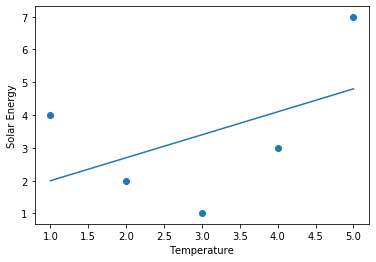

In [306]:
from sklearn.linear_model import LinearRegression
X = x[:,np.newaxis]
model = LinearRegression().fit(X,y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x,yfit);
plt.xlabel('Temperature')
plt.ylabel('Solar Energy')

In [307]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


Text(0, 0.5, 'Solar Energy')

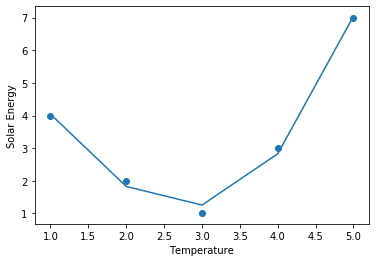

In [308]:
model = LinearRegression().fit(X2,y)
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x,yfit);
plt.xlabel('Temperature')
plt.ylabel('Solar Energy')

In [309]:
#feature pipeline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from numpy import nan

X = np.array([
    [nan, 0, 3],
    [3, 7, 9],
    [3, 5, 2],
    [4, nan, 6],
    [8, 8, 1]
])
y = np.array([14,16,-1,8,-5])

model = make_pipeline(Imputer(strategy='mean'), PolynomialFeatures(degree=5), LinearRegression())

C:\Users\Aditi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [310]:
model.fit(X,y)
print(y)

[14 16 -1  8 -5]


In [311]:
#30/07/2020

In [312]:
#feature engineering
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'},
]

In [313]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [314]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [315]:
vec =  DictVectorizer(sparse=True, dtype=int)
d = vec.fit_transform(data)
print(d)

  (0, 1)	1
  (0, 3)	850000
  (0, 4)	4
  (1, 0)	1
  (1, 3)	700000
  (1, 4)	3
  (2, 2)	1
  (2, 3)	650000
  (2, 4)	3
  (3, 0)	1
  (3, 3)	600000
  (3, 4)	2


In [316]:
#05/08/2020

In [317]:
from numpy import mean
from numpy import array
from numpy import cov
from numpy.linalg import eig

A = array([
    [1,2],
    [3,4],
    [5,6]
])
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [318]:
M = mean(A.T, axis=1)
print(M)

[3. 4.]


In [319]:
C = A-M
print(C)

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


In [320]:
V = cov(C.T)
print(V)

[[4. 4.]
 [4. 4.]]


In [321]:
values, vectors = eig(V)
print(values)

[8. 0.]


In [322]:
P = vectors.T.dot(C.T)
print(P.T)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


In [323]:
from sklearn.datasets import fetch_mldata

In [324]:
#PCA
from sklearn import datasets
digits = datasets.load_digits()

In [325]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [326]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [327]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lb1, test_lb1 = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [328]:
train_img.shape

(1347, 64)

In [329]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

In [330]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [331]:
pca.n_components_

28

In [332]:
train_img.shape

(1347, 64)

In [333]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [334]:
train_img.shape

(1347, 28)